# 🧪 Lab 1: Accessing and Forecasting Public Weather Data via API

**Objective**: Retrieve hourly weather data using the Open-Meteo API, convert it into a pandas DataFrame, and forecast future temperatures using Prophet.

**Theory**:
- APIs allow programs to access external data sources.
- JSON is a structured format that can be parsed into Python dictionaries.
- `pandas` converts structured data into tabular format.
- Prophet is a time series forecasting model that handles seasonality, trends, and missing data.

In [3]:
# 📦 Step 1: Import required libraries
!pip install prophet --upgrade
import requests
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

## 🌍 Step 2: Define location and API parameters
We’ll use Barrie, Ontario (latitude: 44.31, longitude: -79.79) and request hourly temperature data.

In [4]:
# Define API endpoint and parameters
url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": 44.31,
    "longitude": -79.79,
    "hourly": "temperature_2m",
    "timezone": "America/Toronto"
}

# Send GET request
response = requests.get(url, params=params)
data = response.json()
data['hourly'].keys()

dict_keys(['time', 'temperature_2m'])

## 🧾 Step 3: Convert JSON to pandas DataFrame
We’ll extract the hourly timestamps and temperatures into a table.

In [5]:
# Extract hourly data
df = pd.DataFrame({
    "time": data['hourly']['time'],
    "temperature_2m": data['hourly']['temperature_2m']
})

# Convert time column to datetime
df['time'] = pd.to_datetime(df['time'])
df.head()

,time,temperature_2m
0,2025-11-03 00:00:00,5.0
1,2025-11-03 01:00:00,5.1
2,2025-11-03 02:00:00,5.3
3,2025-11-03 03:00:00,5.0
4,2025-11-03 04:00:00,4.8


## 📊 Step 4: Visualize temperature trends
We’ll plot hourly temperature over time for Barrie, Ontario.

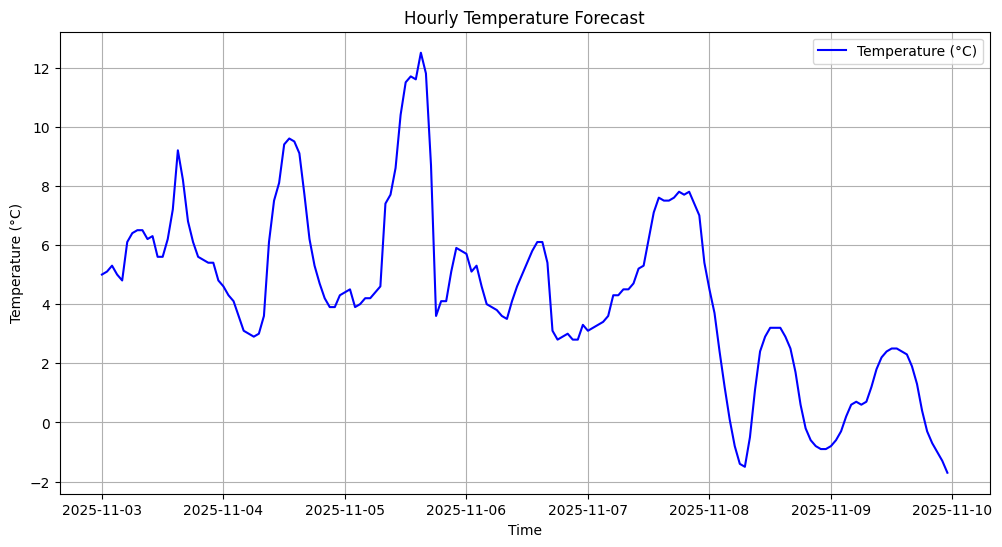

In [6]:
# Plot temperature trend
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['temperature_2m'], label="Temperature (°C)", color='blue')
plt.title("Hourly Temperature Forecast")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
# plt.tight_layout()
plt.show()

## 🔮 Step 5: Forecast future temperatures using Prophet
Prophet requires columns `ds` (datetime) and `y` (value). We’ll forecast the next 48 hours.

In [15]:

# Prepare data for Prophet
df_prophet = df.rename(columns={"time": "ds", "temperature_2m": "y"})

# Fit model
model = Prophet()
model.fit(df_prophet)

# Create future dataframe
future = model.make_future_dataframe(periods=48, freq='H')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
# forecast.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
211,2025-11-11 19:00:00,-3.069062,-5.748056,-1.753071,-3.307734,-2.855439,-0.637277,-0.637277,-0.637277,-0.637277,-0.637277,-0.637277,0.0,0.0,0.0,-3.706339
212,2025-11-11 20:00:00,-3.138379,-6.083303,-1.918227,-3.384525,-2.913547,-0.773556,-0.773556,-0.773556,-0.773556,-0.773556,-0.773556,0.0,0.0,0.0,-3.911935
213,2025-11-11 21:00:00,-3.207696,-5.929575,-1.746774,-3.467169,-2.976802,-0.641445,-0.641445,-0.641445,-0.641445,-0.641445,-0.641445,0.0,0.0,0.0,-3.849141
214,2025-11-11 22:00:00,-3.277013,-5.850497,-1.761237,-3.544077,-3.037659,-0.573592,-0.573592,-0.573592,-0.573592,-0.573592,-0.573592,0.0,0.0,0.0,-3.850605
215,2025-11-11 23:00:00,-3.346330,-6.254314,-2.002797,-3.625349,-3.097575,-0.726503,-0.726503,-0.726503,-0.726503,-0.726503,-0.726503,0.0,0.0,0.0,-4.072833


## 📈 Step 6: Plot forecast
We’ll visualize predicted temperatures and uncertainty intervals.

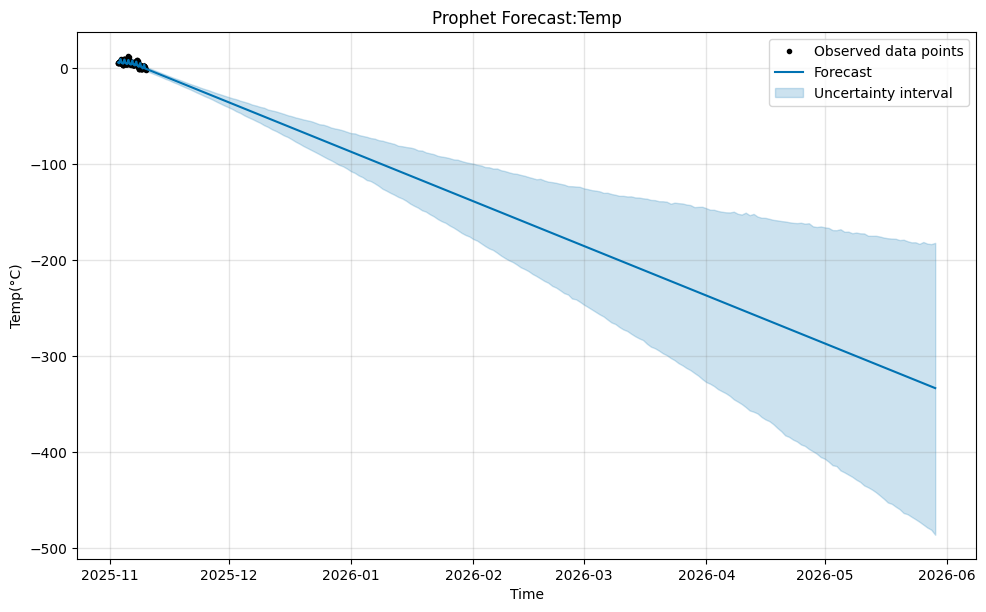

In [13]:
# Plot forecast
model.plot(forecast)
plt.title("Prophet Forecast:Temp")
plt.xlabel("Time")
plt.ylabel("Temp(°C)")
plt.legend()
plt.show()

## 📝 Reflection Questions

1. What assumptions does Prophet make about time series data?
2. How could this forecast be used in agriculture, energy, or public health?
3. What are the limitations of using hourly temperature data for long-term forecasting?
4. How would you adapt this pipeline to forecast other variables like wind speed or precipitation?